## Raw data to clean data conversion using python EDA

In [70]:
import pandas as pd

In [71]:
emp = pd.read_excel(r'C:\Users\TANISHQ\Naresh_IT_Everyday_Personal\Rawdata.xlsx')

In [72]:
emp # We have to clean this dataset

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [73]:
emp.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [74]:
emp.shape

(6, 6)

In [75]:
emp.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [76]:
emp.tail()

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [77]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [78]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [79]:
emp.isnull().sum()    # you can also use isna() instead of isnull()
# here we can see number of empty places in each column(feature,attribute,variable) of dataset

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

### Now lets clean each column

In [81]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [82]:
emp['Name'] = emp['Name'].str.replace(r'\W','',regex=True)

Explanation:

- r'\W' matches any non-word character (equivalent to [^a-zA-Z0-9_]).

- '' to remove extra space

- regex=True specifies that you are using a regular expression.

In [99]:
emp['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [104]:
emp['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [106]:
emp['Domain'] = emp['Domain'].str.replace(r'\W','',regex=True)
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [108]:
emp['Age']

0    34 years
1      45' yr
2         NaN
3         NaN
4       67-yr
5        55yr
Name: Age, dtype: object

In [110]:
emp['Age'] = emp['Age'].str.replace(r'\W','',regex=True)
emp['Age']

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

#### For Age you just need numerical data so lets just extract numerical data

In [118]:
emp['Age'] = emp['Age'].str.extract('(\d+)')

Explanation:

- str.extract('(\d+)') uses a regular expression to find and extract one or more digits.

- (\d+) captures one or more digits as a group.

In [120]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [124]:
emp['Location'] = emp['Location'].str.replace(r'\W','',regex=True)
emp['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [126]:
emp['Salary']

0     5^00#0
1    10%%000
2    1$5%000
3     2000^0
4     30000-
5    6000^$0
Name: Salary, dtype: object

In [128]:
emp['Salary'] = emp['Salary'].str.replace(r'\W','',regex=True)
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [130]:
emp['Exp']

0         2+
1         <3
2     4> yrs
3        NaN
4    5+ year
5        10+
Name: Exp, dtype: object

In [132]:
emp['Exp'] = emp['Exp'].str.replace(r'\W','',regex=True)
emp['Exp']

0        2
1        3
2     4yrs
3      NaN
4    5year
5       10
Name: Exp, dtype: object

In [136]:
emp['Exp'] = emp['Exp'].str.extract('(\d+)')
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

### Till now we had raw data, So we used regex to clean the data and removed all noise characters from the dataset 

In [140]:
clean_data = emp.copy()

In [142]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [144]:
clean_data.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [151]:
import numpy as np

#### Lets fill numerical missing data

In [153]:
clean_data['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [157]:
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))

Explanation:

- Conversion to Numeric: "pd.to_numeric(clean_data['Age'])" converts the 'Age' column to numeric,    turning any non-convertible values into NaN.

- Calculate Mean: mean_age = np.mean() computes the mean of the non-NaN values.

- Fill Missing Values: clean_data['Age'].fillna(mean_age) replaces NaN values with the calculated mean.


Here:

* Non-numeric values are converted to NaN.
 
* The mean of the numeric values is calculated.
  
* Missing values are filled with this mean.

In [159]:
clean_data['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [165]:
clean_data['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [167]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [169]:
clean_data['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [171]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


#### Now, lets fill categorical missing data

In [176]:
clean_data['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [178]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])

Explanation:

- Calculate Mode: clean_data['Location'].mode()[0] gets the most frequent value. 
- If there are multiple modes, [0] takes the first one. If you want to handle multiple modes differently, you'll need to add additional logic.

- Fill Missing Values: ".fillna" replaces NaN values with the mode value.

In [184]:
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [186]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


#### Here every attribute is shown as object, so lets change them to int and categorical

In [191]:
clean_data['Age'] = clean_data['Age'].astype(int)
clean_data['Salary'] = clean_data['Salary'].astype(int)
clean_data['Exp'] = clean_data['Exp'].astype(int)

In [189]:
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

In [193]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 866.0 bytes


In [195]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


#### Now lets save this cleaned data as a new csv file with name CLEANED_DATA

In [208]:
clean_data.to_csv('CLEANED_DATA.csv')  #Dont forget to add .csv in file name

In [210]:
import os
os.getcwd()

# Import os Module: This imports the os module, which provides a way of interacting with the operating system.
# os.getcwd(): This function returns the current working directory as a string(where are file is saved).

'C:\\Users\\TANISHQ\\Naresh_IT_Everyday_Personal'

# Lets Apply EDA technique
Exploratory Data Analysis (EDA) with Python involves analyzing and summarizing data to gain insights and understand its underlying patterns, relationships, and distributions

In [213]:
import matplotlib.pyplot as plt # matplotlib.pyplot is a powerful tool for data visualization in Python
import seaborn as sns  #Seaborn is a statistical data visualization library built on top of Matplotlib

In [215]:
import warnings
warnings.filterwarnings('ignore')

- The warnings module in Python is used to handle and control warnings that may arise during the execution of a program.

- Suppressing WarningsUsing warnings.filterwarnings('ignore') is a way to suppress these warnings. To prevent warnings from cluttering your output.

In [217]:
clean_data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int32

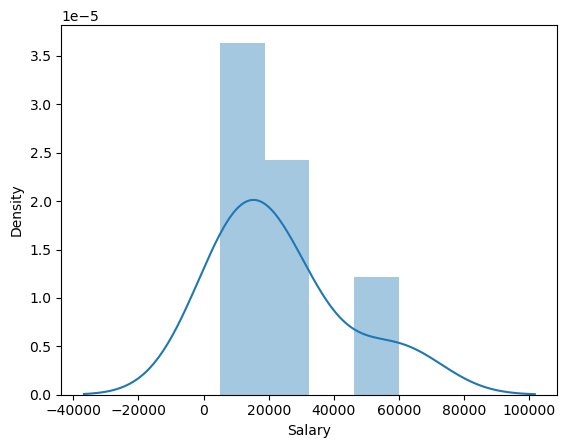

In [223]:
vis1 = sns.distplot(clean_data['Salary'])

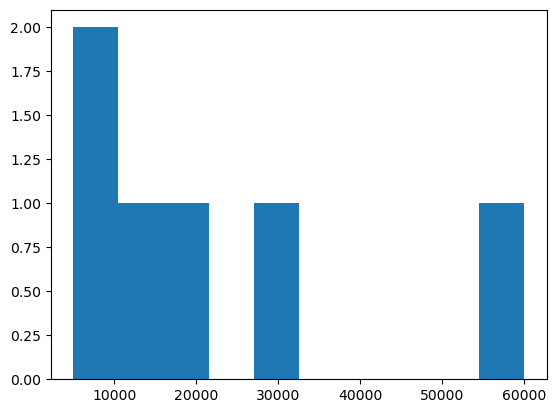

In [225]:
vis2 = plt.hist(clean_data['Salary'])

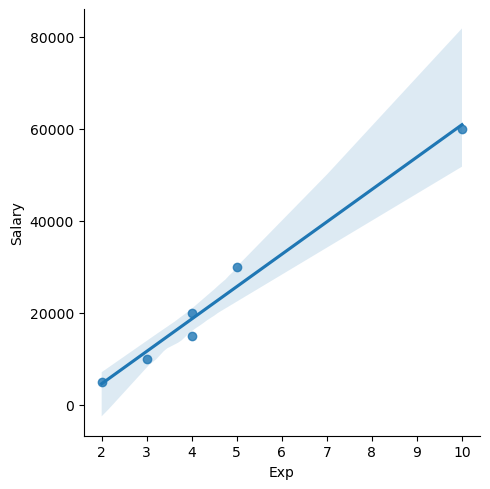

In [227]:
vis4 = sns.lmplot(data = clean_data, x = 'Exp', y = 'Salary')

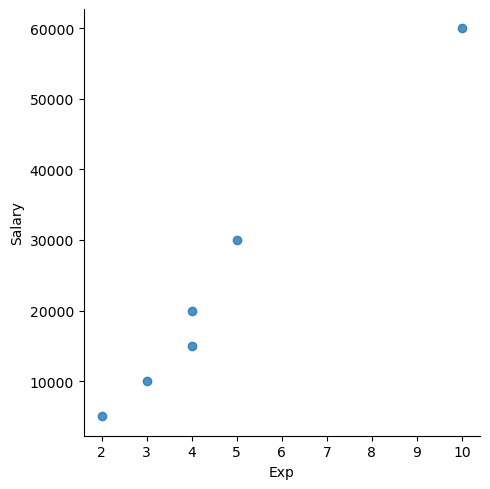

In [229]:
vis5 = sns.lmplot(data = clean_data, x = 'Exp', y = 'Salary', fit_reg = False)

In [231]:
clean_data[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [233]:
clean_data[0:6:2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [235]:
clean_data[::-1]

,Name,Domain,Age,Location,Salary,Exp
5,Kim,NLP,55,Delhi,60000,10
4,Uttam,Statistics,67,Bangalore,30000,5
3,Jane,Analytics,50,Hyderbad,20000,4
2,Umar,Dataanalyst,50,Bangalore,15000,4
1,Teddy,Testing,45,Bangalore,10000,3
0,Mike,Datascience,34,Mumbai,5000,2


In [237]:
clean_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [239]:
x_iv = clean_data[['Name', 'Domain', 'Age', 'Location', 'Exp']]   # INDEPENDENT VARIABLE

In [241]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [243]:
y_dv = clean_data[['Salary']]  #DEPENDENT VARIABLE

In [245]:
y_dv 

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [247]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [249]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


### IMPUTATION : The missing data are filled in to create a complete data matrix that can be analyzed using standard methods

In [271]:
imputation = pd.get_dummies(clean_data)

In [273]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [275]:
imputation = pd.get_dummies(clean_data).astype(int)

In [277]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
